1. IMPORTING ESSENTIAL LIBRARIES FOR THIS PROJECT

In [180]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np


2. LOADING TRAINING AND TEST DATASETS FROM BRAIN_TUMOR_DATASET DIRECTORY

In [181]:
path = "brain_tumor_dataset/"
training_set = tf.keras.preprocessing.image_dataset_from_directory(path,
                                             shuffle=True,
                                             batch_size=64,
                                             image_size=(160,160),
                                             validation_split=0.15,
                                             subset='training',
                                             seed=34)
test_set = tf.keras.preprocessing.image_dataset_from_directory(path,
                                             shuffle=True,
                                             batch_size=64,
                                             image_size=(160,160),
                                             validation_split=0.17,
                                             subset='validation',
                                             seed=34)

train_dataset = training_set.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 253 files belonging to 2 classes.
Using 216 files for training.
Found 253 files belonging to 2 classes.
Using 43 files for validation.


3. DEFINING DATA AUGMENTATION AND MODEL FUNCTIONS

In [182]:
def data_augmenter():
    """ augment your data for making your data less prone to overfitting.
    :returns: data augmentation model
    """

    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"))
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.34))
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomCrop(160,160))
    
    return data_augmentation

In [183]:
def tumor_identifier(image_shape=(160,160), data_augmentation=data_augmenter()):
    """ create a model for your tumor identification project. you can also use other applications of keras.
    :param image_shape: shape of the input images
    :type image_shape: tuple
    :param data
    """

    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape) 
    
    x = data_augmentation(inputs) 
    x = tf.keras.applications.mobilenet_v3.preprocess_input(x)
    
    x = base_model(x, training=False) 
    
    x = tf.keras.layers.GlobalMaxPooling2D()(x) 
    x = tf.keras.layers.Dropout(0.34)(x)
        
    outputs = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    

    return model

4. COMPILING AND SETTING METRICS

In [184]:
brain_model = tumor_identifier((160,160), data_augmenter())

brain_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0034),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['acc'])

5. TRAINING AND GETTING RESULTS

In [185]:

history = brain_model.fit(
        training_set,
        validation_data=test_set,
        epochs=150, 
        shuffle=True, 
        verbose=True,
        )

Epoch 1/150
4/4 [==============================] - 3s 259ms/step - loss: 0.7961 - acc: 0.4769 - val_loss: 0.6452 - val_acc: 0.6977
Epoch 2/150
4/4 [==============================] - 0s 58ms/step - loss: 0.6670 - acc: 0.6759 - val_loss: 0.5126 - val_acc: 0.7209
Epoch 3/150
4/4 [==============================] - 0s 58ms/step - loss: 0.4837 - acc: 0.7407 - val_loss: 0.5184 - val_acc: 0.7209
Epoch 4/150
4/4 [==============================] - 0s 59ms/step - loss: 0.4714 - acc: 0.7454 - val_loss: 0.4732 - val_acc: 0.7674
Epoch 5/150
4/4 [==============================] - 0s 59ms/step - loss: 0.4626 - acc: 0.7130 - val_loss: 0.4148 - val_acc: 0.8372
Epoch 6/150
4/4 [==============================] - 0s 52ms/step - loss: 0.3951 - acc: 0.8102 - val_loss: 0.4093 - val_acc: 0.7907
Epoch 7/150
4/4 [==============================] - 0s 58ms/step - loss: 0.3141 - acc: 0.8380 - val_loss: 0.4008 - val_acc: 0.7907
Epoch 8/150
4/4 [==============================] - 0s 59ms/step - loss: 0.3197 - acc: 0.8

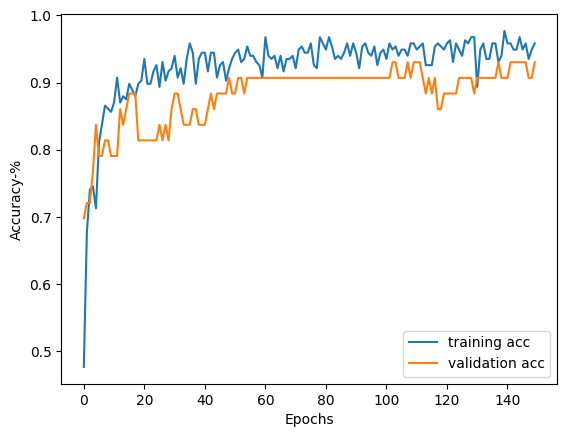

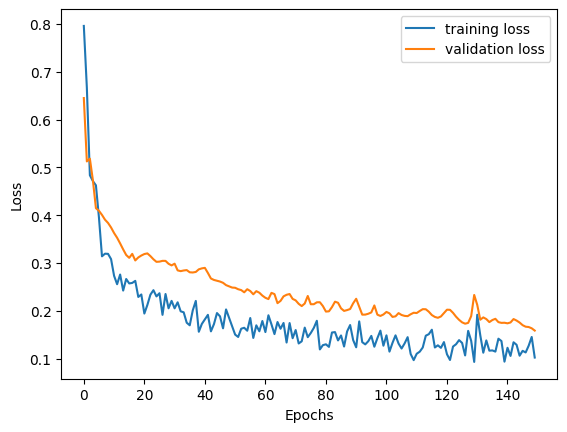

In [187]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy-%')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Brain model is performing succesfully. It has reached 95.37% accuracy on training data, and 93.02% on test data.

6. EVALUATION OF MODEL

In [188]:
train_result = brain_model.evaluate(training_set)
val_result = brain_model.evaluate(test_set)

1/1 [==============================] - 0s 68ms/step - loss: 0.1588 - acc: 0.9302


7. FINAL RESULTS: 96.76% ACCURACY ON TRAINING SET
                  93.02% ACCURACY ON TEST SET